# Numpy入门[11]——生成数组的函数

> 参考：
>
> [https://ailearning.apachecn.org/](https://ailearning.apachecn.org/)
>
> 使用Jupyter进行练习

In [1]:
import numpy as np

## arange

`arange` 类似于Python中的 `range` 函数，只不过返回的不是列表，而是数组：

```python
arange(start, stop = None, step = 1, dtype = None)
```

产生一个在区间 `[start, stop)` 之间，以 `step`为间隔的数组，如果只输入一个参数，则默认从 0 开始，并以这个值为结束：


In [2]:
np.arange(4)

array([0, 1, 2, 3])

与 `range` 不同， `arange` 允许非整数值输入，产生一个非整型的数组：

In [4]:
np.arange(0, 2 * np.pi, np.pi/4)

array([0.        , 0.78539816, 1.57079633, 2.35619449, 3.14159265,
       3.92699082, 4.71238898, 5.49778714])

数组的类型默认由参数 `start, stop, step` 来确定，也可以指定：

In [5]:
np.arange(0, 2 * np.pi, np.pi / 4, dtype=np.float32)

array([0.       , 0.7853982, 1.5707964, 2.3561945, 3.1415927, 3.926991 ,
       4.712389 , 5.4977875], dtype=float32)

由于存在精度问题，使用浮点数可能出现问题：

In [6]:
np.arange(1.5, 2.1, 0.3)

array([1.5, 1.8, 2.1])

stop 的值 `2.1` 出现在了数组中，所以使用浮点数的时候需要注意。

## linspace

```python
linspace(start, stop, N) 
```

产生 `N` 个等距分布在 `[start, stop]`间的元素组成的数组，包括 `start, stop`。

In [7]:
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

## logspace

```python
logspace(start, stop, N) 
```

产生 N 个对数等距分布的数组，默认以10为底：

In [8]:
np.logspace(0, 1, 5)

array([ 1.        ,  1.77827941,  3.16227766,  5.62341325, 10.        ])

产生的值为$\left[ 10^0,10^{0.25},10^{0.5},10^{0.75},10^1\right]$

## meshgrid

有时候需要在二维平面中生成一个网格，这时候可以使用 `meshgrid` 来完成这样的工作：

In [9]:
x_ticks = np.linspace(-1, 1, 5)
y_ticks = np.linspace(-1, 1, 5)

x, y = np.meshgrid(x_ticks, y_ticks)

生成的`x,y`如下：

In [11]:
y

array([[-1. , -1. , -1. , -1. , -1. ],
       [-0.5, -0.5, -0.5, -0.5, -0.5],
       [ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.5,  0.5,  0.5,  0.5,  0.5],
       [ 1. ,  1. ,  1. ,  1. ,  1. ]])

In [10]:
x

array([[-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ]])

`x`对应网格的第一维，`y`对应网格的第二维。

C:\Users\26969\AppData\Local\Temp\ipykernel_14436\1660655670.py:8: RuntimeWarning: invalid value encountered in true_divide
  result = np.sin(r) / r


Text(0.5, 0, 'z')

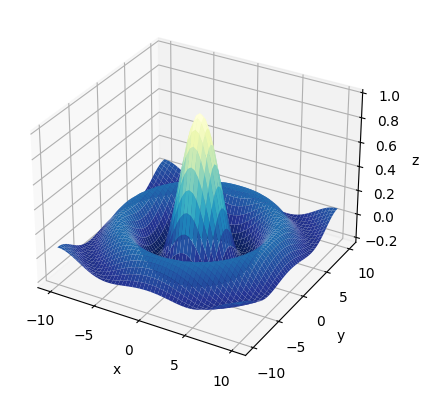

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def f(x, y):
    # sinc 函数
    r = np.sqrt(x ** 2 + y ** 2)
    result = np.sin(r) / r
    result[r == 0] = 1.0
    return result

x_ticks = np.linspace(-10, 10, 51)
y_ticks = np.linspace(-10, 10, 51)

x, y = np.meshgrid(x_ticks, y_ticks)

z = f(x, y)

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,
                rstride=1, cstride=1,
                cmap=cm.YlGnBu_r)
                
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


事实上，x, y 中有很多冗余的元素，这里提供了一个 `sparse` 的选项，在这个选项下，x, y 变成了单一的行向量和列向量。

In [13]:
x_ticks = np.linspace(-1, 1, 5)
y_ticks = np.linspace(-1, 1, 5)

x, y = np.meshgrid(x_ticks, y_ticks, sparse=True)
print(x)
print(y)

[[-1.  -0.5  0.   0.5  1. ]]
[[-1. ]
 [-0.5]
 [ 0. ]
 [ 0.5]
 [ 1. ]]


但并不影响结果：

meshgrid 可以设置轴排列的先后顺序：

+ 默认为 `indexing='xy'` 即笛卡尔坐标，对于2维数组，返回行向量 x 和列向量 y

+ 或者使用 `indexing='ij'` 即矩阵坐标，对于2维数组，返回列向量 x 和行向量 y。

## 行向量与列向量

可以使用`r_ / c_`来产生行向量或者列向量

In [14]:
np.r_[0:1: 0.25]

array([0.  , 0.25, 0.5 , 0.75])

In [16]:
np.r_[0:1:5j]

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

连接多个序列，产生数组：

In [15]:
np.r_[(3, 22, 11), 4.0, [15,6]]

array([ 3., 22., 11.,  4., 15.,  6.])

列向量：

In [17]:
np.c_[1:3:5j]

array([[1. ],
       [1.5],
       [2. ],
       [2.5],
       [3. ]])

## 全0或全1数组

```python
ones(shape, dtype=float64)
zeros(shape, dtype=float64)
```
产生一个制定形状的全 0 或全 1 的数组，还可以制定数组类型：

In [18]:
np.zeros(3)

array([0., 0., 0.])

In [19]:
np.ones([2,3], dtype=np.float32)

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

产生一个全是`4`的数组：

In [21]:
np.ones([2,2]) * 4

array([[4., 4.],
       [4., 4.]])

## 空数组

```python
empty(shape, dtype=float64, order='C') 
```

使用 `empty` 方法产生一个制定大小的数组，再用 `fill` 方法填充：

In [23]:
a = np.empty(2)
a

array([inf, inf])

In [24]:
a.fill(5)
a

array([5., 5.])

## empty_like, ones_like, zeros_like

```python
empty_like(a)
ones_like(a)
zeros_like(a) 
```

产生一个跟 a 大小一样，类型一样的对应数组。

In [25]:
a = np.arange(0, 10, 2.5)
a

array([0. , 2.5, 5. , 7.5])

In [26]:
np.empty_like(a)

array([0. , 2.5, 5. , 7.5])

In [27]:
np.zeros_like(a)

array([0., 0., 0., 0.])

In [28]:
np.ones_like(a)

array([1., 1., 1., 1.])